#### Logistic regression 

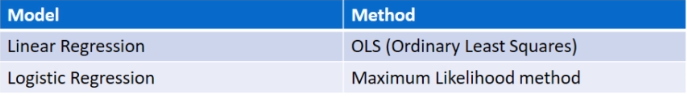

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
hdf=pd.read_csv('House-Price.csv',header=0)

In [3]:
hdf

,price,resid_area,air_qual,room_num,age,dist1,dist2,dist3,dist4,teachers,poor_prop,airport,n_hos_beds,n_hot_rooms,waterbody,rainfall,bus_ter,parks,Sold
0,24.0,32.31,0.538,6.575,65.2,4.35,3.81,4.18,4.01,24.7,4.98,YES,5.480,11.1920,River,23,YES,0.049347,0
1,21.6,37.07,0.469,6.421,78.9,4.99,4.70,5.12,5.06,22.2,9.14,NO,7.332,12.1728,Lake,42,YES,0.046146,1
2,34.7,37.07,0.469,7.185,61.1,5.03,4.86,5.01,4.97,22.2,4.03,NO,7.394,101.1200,None,38,YES,0.045764,0
3,33.4,32.18,0.458,6.998,45.8,6.21,5.93,6.16,5.96,21.3,2.94,YES,9.268,11.2672,Lake,45,YES,0.047151,0
4,36.2,32.18,0.458,7.147,54.2,6.16,5.86,6.37,5.86,21.3,5.33,NO,8.824,11.2896,Lake,55,YES,0.039474,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,22.4,41.93,0.573,6.593,69.1,2.64,2.45,2.76,2.06,19.0,9.67,NO,9.348,12.1792,Lake and River,27,YES,0.056006,1
502,20.6,41.93,0.573,6.120,76.7,2.44,2.11,2.46,2.14,19.0,9.08,YES,6.612,13.1648,Lake and River,20,YES,0.059903,1
503,23.9,41.93,0.573,6.976,91.0,2.34,2.06,2.29,1.98,19.0,5.64,NO,5.478,12.1912,None,31,YES,0.057572,1
504,22.0,41.93,0.573,6.794,89.3,2.54,2.31,2.40,2.31,19.0,6.48,YES,7.940,15.1760,None,47,YES,0.060694,1


##### Exploratory Data Analysis

In [4]:
hdf.describe()

,price,resid_area,air_qual,room_num,age,dist1,dist2,dist3,dist4,teachers,poor_prop,n_hos_beds,n_hot_rooms,rainfall,parks,Sold
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,498.000000,506.000000,506.000000,506.000000,506.000000
mean,22.528854,41.136779,0.554695,6.284634,68.574901,3.971996,3.628775,3.960672,3.618972,21.544466,12.653063,7.899767,13.041605,39.181818,0.054454,0.454545
std,9.182176,6.860353,0.115878,0.702617,28.148861,2.108532,2.108580,2.119797,2.099203,2.164946,7.141062,1.476683,5.238957,12.513697,0.010632,0.498422
min,5.000000,30.460000,0.385000,3.561000,2.900000,1.130000,0.920000,1.150000,0.730000,18.000000,1.730000,5.268000,10.057600,3.000000,0.033292,0.000000
25%,17.025000,35.190000,0.449000,5.885500,45.025000,2.270000,1.940000,2.232500,1.940000,19.800000,6.950000,6.634500,11.189800,28.000000,0.046464,0.000000
50%,21.200000,39.690000,0.538000,6.208500,77.500000,3.385000,3.010000,3.375000,3.070000,20.950000,11.360000,7.999000,12.720000,39.000000,0.053507,0.000000
75%,25.000000,48.100000,0.624000,6.623500,94.075000,5.367500,4.992500,5.407500,4.985000,22.600000,16.955000,9.088000,14.170800,50.000000,0.061397,1.000000
max,50.000000,57.740000,0.871000,8.780000,100.000000,12.320000,11.930000,12.320000,11.940000,27.400000,37.970000,10.876000,101.120000,60.000000,0.086711,1.000000


In [5]:
hdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   price        506 non-null    float64
 1   resid_area   506 non-null    float64
 2   air_qual     506 non-null    float64
 3   room_num     506 non-null    float64
 4   age          506 non-null    float64
 5   dist1        506 non-null    float64
 6   dist2        506 non-null    float64
 7   dist3        506 non-null    float64
 8   dist4        506 non-null    float64
 9   teachers     506 non-null    float64
 10  poor_prop    506 non-null    float64
 11  airport      506 non-null    object 
 12  n_hos_beds   498 non-null    float64
 13  n_hot_rooms  506 non-null    float64
 14  waterbody    506 non-null    object 
 15  rainfall     506 non-null    int64  
 16  bus_ter      506 non-null    object 
 17  parks        506 non-null    float64
 18  Sold         506 non-null    int64  
dtypes: float

<AxesSubplot:ylabel='n_hos_beds'>

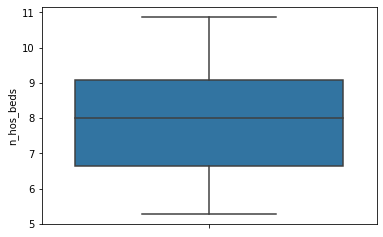

In [6]:
sns.boxplot(y='n_hos_beds',data=hdf)

<AxesSubplot:ylabel='n_hot_rooms'>

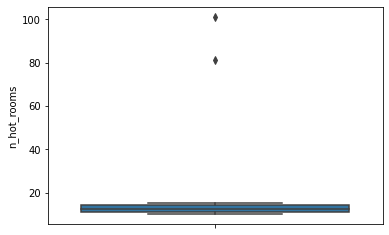

In [7]:
sns.boxplot(y='n_hot_rooms',data=hdf)

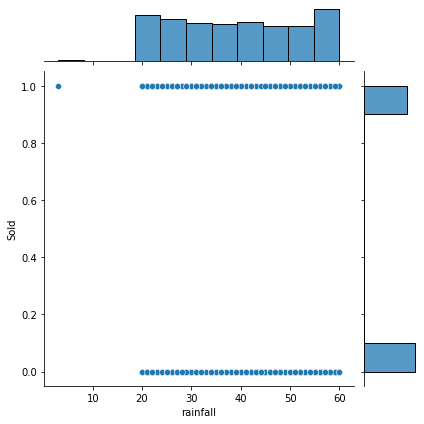

In [8]:
sns.jointplot(x='rainfall',y='Sold',data=hdf)

<AxesSubplot:xlabel='airport', ylabel='count'>

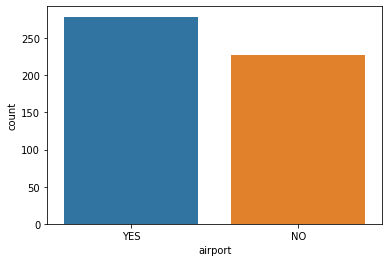

In [9]:
sns.countplot(x='airport',data=hdf)

<AxesSubplot:xlabel='waterbody', ylabel='count'>

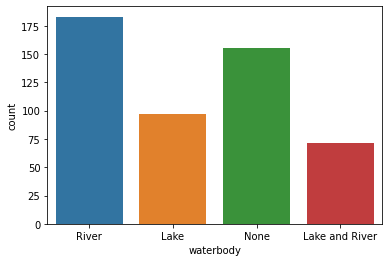

In [10]:
sns.countplot(x='waterbody',data=hdf)

<AxesSubplot:xlabel='bus_ter', ylabel='count'>

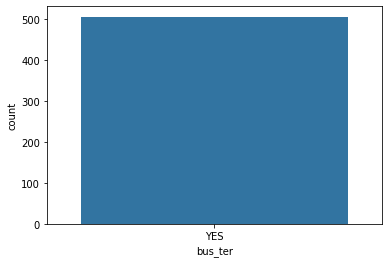

In [11]:
sns.countplot(x='bus_ter',data=hdf) # we can delete the bus terminal as it is acting as constant.

#### Note:
1. missing values in n_hos_beds
2. bus_terminal acting as constant variable
3. outliers exist in n_hot_rooms and rainfall.

In [12]:
uv=np.percentile(hdf.n_hot_rooms,[99])[0]   #outlier treatment getting 99 percentile value.

In [13]:
hdf[hdf.n_hot_rooms>uv]

,price,resid_area,air_qual,room_num,age,dist1,dist2,dist3,dist4,teachers,poor_prop,airport,n_hos_beds,n_hot_rooms,waterbody,rainfall,bus_ter,parks,Sold
2,34.7,37.07,0.4690,7.185,61.1,5.03,4.86,5.01,4.97,22.2,4.03,NO,7.394,101.12,None,38,YES,0.045764,0
166,50.0,49.58,0.6050,7.929,96.2,2.11,1.91,2.31,1.86,25.3,3.70,YES,8.300,15.40,River,37,YES,0.052105,0
204,50.0,32.68,0.4161,8.034,31.9,5.41,4.80,5.28,4.99,25.3,2.88,YES,8.900,15.40,River,51,YES,0.044178,0
267,50.0,33.97,0.5750,8.297,67.0,2.60,2.13,2.43,2.52,27.0,7.44,YES,8.000,15.40,None,42,YES,0.063235,0
369,50.0,48.10,0.6310,6.683,96.8,1.55,1.28,1.65,0.94,19.8,3.73,YES,6.700,15.40,River,58,YES,0.067477,0
423,13.4,48.10,0.6140,6.103,85.1,2.08,1.80,2.34,1.87,19.8,23.29,NO,8.268,81.12,Lake,29,YES,0.063344,0


In [14]:
hdf.n_hot_rooms[hdf.n_hot_rooms>3*uv]=3*uv

<ipython-input-14-d076cdff9fe2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hdf.n_hot_rooms[hdf.n_hot_rooms>3*uv]=3*uv


In [15]:
hdf.describe()

,price,resid_area,air_qual,room_num,age,dist1,dist2,dist3,dist4,teachers,poor_prop,n_hos_beds,n_hot_rooms,rainfall,parks,Sold
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,498.000000,506.000000,506.000000,506.000000,506.000000
mean,22.528854,41.136779,0.554695,6.284634,68.574901,3.971996,3.628775,3.960672,3.618972,21.544466,12.653063,7.899767,12.864050,39.181818,0.054454,0.454545
std,9.182176,6.860353,0.115878,0.702617,28.148861,2.108532,2.108580,2.119797,2.099203,2.164946,7.141062,1.476683,2.688778,12.513697,0.010632,0.498422
min,5.000000,30.460000,0.385000,3.561000,2.900000,1.130000,0.920000,1.150000,0.730000,18.000000,1.730000,5.268000,10.057600,3.000000,0.033292,0.000000
25%,17.025000,35.190000,0.449000,5.885500,45.025000,2.270000,1.940000,2.232500,1.940000,19.800000,6.950000,6.634500,11.189800,28.000000,0.046464,0.000000
50%,21.200000,39.690000,0.538000,6.208500,77.500000,3.385000,3.010000,3.375000,3.070000,20.950000,11.360000,7.999000,12.720000,39.000000,0.053507,0.000000
75%,25.000000,48.100000,0.624000,6.623500,94.075000,5.367500,4.992500,5.407500,4.985000,22.600000,16.955000,9.088000,14.170800,50.000000,0.061397,1.000000
max,50.000000,57.740000,0.871000,8.780000,100.000000,12.320000,11.930000,12.320000,11.940000,27.400000,37.970000,10.876000,46.198560,60.000000,0.086711,1.000000


In [16]:
lv=np.percentile(hdf.rainfall,[1])[0]
lv

20.0

In [17]:
hdf.rainfall[hdf.rainfall<0.3*lv]=0.3*lv

<ipython-input-17-480463cc9725>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hdf.rainfall[hdf.rainfall<0.3*lv]=0.3*lv


In [18]:
hdf.describe()

,price,resid_area,air_qual,room_num,age,dist1,dist2,dist3,dist4,teachers,poor_prop,n_hos_beds,n_hot_rooms,rainfall,parks,Sold
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,498.000000,506.000000,506.000000,506.000000,506.000000
mean,22.528854,41.136779,0.554695,6.284634,68.574901,3.971996,3.628775,3.960672,3.618972,21.544466,12.653063,7.899767,12.864050,39.187747,0.054454,0.454545
std,9.182176,6.860353,0.115878,0.702617,28.148861,2.108532,2.108580,2.119797,2.099203,2.164946,7.141062,1.476683,2.688778,12.497221,0.010632,0.498422
min,5.000000,30.460000,0.385000,3.561000,2.900000,1.130000,0.920000,1.150000,0.730000,18.000000,1.730000,5.268000,10.057600,6.000000,0.033292,0.000000
25%,17.025000,35.190000,0.449000,5.885500,45.025000,2.270000,1.940000,2.232500,1.940000,19.800000,6.950000,6.634500,11.189800,28.000000,0.046464,0.000000
50%,21.200000,39.690000,0.538000,6.208500,77.500000,3.385000,3.010000,3.375000,3.070000,20.950000,11.360000,7.999000,12.720000,39.000000,0.053507,0.000000
75%,25.000000,48.100000,0.624000,6.623500,94.075000,5.367500,4.992500,5.407500,4.985000,22.600000,16.955000,9.088000,14.170800,50.000000,0.061397,1.000000
max,50.000000,57.740000,0.871000,8.780000,100.000000,12.320000,11.930000,12.320000,11.940000,27.400000,37.970000,10.876000,46.198560,60.000000,0.086711,1.000000


### outlier treatment has done

##### Missing Value treatment is to be done

In [19]:
hdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   price        506 non-null    float64
 1   resid_area   506 non-null    float64
 2   air_qual     506 non-null    float64
 3   room_num     506 non-null    float64
 4   age          506 non-null    float64
 5   dist1        506 non-null    float64
 6   dist2        506 non-null    float64
 7   dist3        506 non-null    float64
 8   dist4        506 non-null    float64
 9   teachers     506 non-null    float64
 10  poor_prop    506 non-null    float64
 11  airport      506 non-null    object 
 12  n_hos_beds   498 non-null    float64
 13  n_hot_rooms  506 non-null    float64
 14  waterbody    506 non-null    object 
 15  rainfall     506 non-null    int64  
 16  bus_ter      506 non-null    object 
 17  parks        506 non-null    float64
 18  Sold         506 non-null    int64  
dtypes: float

In [20]:
hdf.n_hos_beds=hdf.n_hos_beds.fillna(hdf.n_hos_beds.mean())  ### filling null values with the mean 

In [21]:
hdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   price        506 non-null    float64
 1   resid_area   506 non-null    float64
 2   air_qual     506 non-null    float64
 3   room_num     506 non-null    float64
 4   age          506 non-null    float64
 5   dist1        506 non-null    float64
 6   dist2        506 non-null    float64
 7   dist3        506 non-null    float64
 8   dist4        506 non-null    float64
 9   teachers     506 non-null    float64
 10  poor_prop    506 non-null    float64
 11  airport      506 non-null    object 
 12  n_hos_beds   506 non-null    float64
 13  n_hot_rooms  506 non-null    float64
 14  waterbody    506 non-null    object 
 15  rainfall     506 non-null    int64  
 16  bus_ter      506 non-null    object 
 17  parks        506 non-null    float64
 18  Sold         506 non-null    int64  
dtypes: float

In [22]:
hdf['avg_dist']=hdf['dist1']+hdf['dist2']+hdf['dist3']+hdf['dist4']

In [23]:
hdf.drop(['dist1','dist2','dist3','dist4'],axis=1,inplace=True)

In [24]:
hdf.drop(['bus_ter'],axis=1,inplace=True)

In [25]:
hdf=pd.get_dummies(hdf)

In [26]:
hdf.head(5)

,price,resid_area,air_qual,room_num,age,teachers,poor_prop,n_hos_beds,n_hot_rooms,rainfall,parks,Sold,avg_dist,airport_NO,airport_YES,waterbody_Lake,waterbody_Lake and River,waterbody_None,waterbody_River
0,24.0,32.31,0.538,6.575,65.2,24.7,4.98,5.480,11.19200,23,0.049347,0,16.35,0,1,0,0,0,1
1,21.6,37.07,0.469,6.421,78.9,22.2,9.14,7.332,12.17280,42,0.046146,1,19.87,1,0,1,0,0,0
2,34.7,37.07,0.469,7.185,61.1,22.2,4.03,7.394,46.19856,38,0.045764,0,19.87,1,0,0,0,1,0
3,33.4,32.18,0.458,6.998,45.8,21.3,2.94,9.268,11.26720,45,0.047151,0,24.26,0,1,1,0,0,0
4,36.2,32.18,0.458,7.147,54.2,21.3,5.33,8.824,11.28960,55,0.039474,0,24.25,1,0,1,0,0,0


In [27]:
hdf.drop(['airport_NO','waterbody_None'],axis=1,inplace=True)

##### Implementing logistic regression

In [28]:
x=hdf[['price']]
y=hdf['Sold']

In [29]:
y.head(5)

0    0
1    1
2    0
3    0
4    0
Name: Sold, dtype: int64

In [30]:
from sklearn.linear_model import LogisticRegression

In [31]:
clf_lrs=LogisticRegression()

In [32]:
clf_lrs.fit(x,y)

LogisticRegression()

In [33]:
clf_lrs?

In [34]:
clf_lrs.coef_

array([[-0.03571865]])

In [35]:
clf_lrs.intercept_

array([0.61477516])

In [36]:
#using statsmodels drawback:bydefault beta0 is 0 .
import statsmodels.api as sm

In [37]:
x_cons=sm.add_constant(x)

In [38]:
import statsmodels.discrete.discrete_model as lrs_sm

In [39]:
logit=lrs_sm.Logit(y,x_cons).fit()

Optimization terminated successfully.
         Current function value: 0.676690
         Iterations 5


In [40]:
logit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                   Sold   No. Observations:                  506
Model:                          Logit   Df Residuals:                      504
Method:                           MLE   Df Model:                            1
Date:                Thu, 27 May 2021   Pseudo R-squ.:                 0.01788
Time:                        12:53:23   Log-Likelihood:                -342.41
converged:                       True   LL-Null:                       -348.64
Covariance Type:            nonrobust   LLR p-value:                 0.0004142
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6149      0.248      2.484      0.013       0.130       1.100
price         -0.0357      0.010     -3.417      0.001      -0.056      -0.015
==============================================================================
"""

#### Logistic Regression with multiple variables.

In [41]:
x_mul=hdf.loc[:,hdf.columns!='Sold']
y_mul=hdf['Sold']
from sklearn.linear_model import LogisticRegression

In [42]:
clf_lrs=LogisticRegression()
clf_lrs.fit(x_mul,y_mul)

C:\Users\Allam\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [43]:
print(clf_lrs.intercept_,clf_lrs.coef_)

[0.02834785] [[-0.2480783  -0.0150968  -0.07274935  0.83697826 -0.00569078  0.23468669
  -0.21528981  0.17128197 -0.09091977 -0.00676025 -0.00316808 -0.08021614
  -0.07975961 -0.11417421 -0.01721462  0.21554636]]


In [44]:
# Using statsmodels
x_mul_cons=sm.add_constant(x_mul)

In [45]:
logit=lrs_sm.Logit(y_mul,x_mul_cons).fit()

Optimization terminated successfully.
         Current function value: 0.556433
         Iterations 6


In [46]:
logit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                   Sold   No. Observations:                  506
Model:                          Logit   Df Residuals:                      489
Method:                           MLE   Df Model:                           16
Date:                Thu, 27 May 2021   Pseudo R-squ.:                  0.1924
Time:                        12:53:25   Log-Likelihood:                -281.56
converged:                       True   LL-Null:                       -348.64
Covariance Type:            nonrobust   LLR p-value:                 9.930e-21
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       -2.1383      2.649     -0.807      0.420      -7.331       3.054
price                       -0.2741      0.033     -8.313      0.000      -0.339      -0.209
resid_area                   0.0192      0.027      0.720      0.471      -0.033       0.071
air_qual                    -7.4183      2.691     -2.757      0.006     -12.693      -2.144
room_num                     1.1067      0.277      4.001      0.000       0.565       1.649
age                         -0.0020      0.007     -0.302      0.762      -0.015       0.011
teachers                     0.3150      0.064      4.937      0.000       0.190       0.440
poor_prop                   -0.2077      0.034     -6.149      0.000      -0.274      -0.141
n_hos_beds                   0.1760      0.071      2.467      0.014       0.036       0.316
n_hot_rooms                 -0.0742      0.052     -1.439      0.150      -0.175       0.027
rainfall                    -0.0033      0.008     -0.394      0.693      -0.020       0.013
parks                       29.1089     24.177      1.204      0.229     -18.277      76.495
avg_dist                    -0.1004      0.024     -4.118      0.000      -0.148      -0.053
airport_YES                 -0.1524      0.211     -0.723      0.469      -0.565       0.261
waterbody_Lake              -0.1032      0.304     -0.340      0.734      -0.698       0.492
waterbody_Lake and River    -0.0626      0.328     -0.191      0.849      -0.705       0.580
waterbody_River              0.2394      0.256      0.937      0.349      -0.262       0.740
============================================================================================
"""

### confusion matrix

In [47]:
clf_lrs.predict_proba(x_mul)

array([[0.11984225, 0.88015775],
       [0.40117425, 0.59882575],
       [0.98111184, 0.01888816],
       ...,
       [0.28599177, 0.71400823],
       [0.27812644, 0.72187356],
       [0.16250228, 0.83749772]])

In [48]:
y_mul_pred=clf_lrs.predict(x_mul)

In [49]:
y_mul_pred

array([1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1,

In [50]:
## let us set the custom boundary for probabilty value as 0.4
y_mul_pred_04=(clf_lrs.predict_proba(x_mul)[:,1]>=0.4)

In [51]:
y_mul_pred_04

array([ True,  True, False, False, False, False,  True, False, False,
       False, False,  True, False, False,  True,  True,  True, False,
       False,  True, False, False, False, False, False,  True, False,
       False, False,  True, False,  True, False, False,  True,  True,
        True,  True,  True, False, False,  True,  True,  True,  True,
        True,  True, False, False, False,  True,  True,  True,  True,
       False, False, False, False, False, False, False, False, False,
       False, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True, False,  True, False,
        True,  True,  True,  True,  True, False,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True, False, False,
        True, False,  True,  True, False,  True, False, False, False,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True, False, False, False, False,
       False, False,

In [52]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_mul,y_mul_pred)    #for y_mul_pred default boundary condition will be 0.5

array([[195,  81],
       [ 80, 150]], dtype=int64)

In [53]:
confusion_matrix(y_mul,y_mul_pred_04) 

array([[154, 122],
       [ 48, 182]], dtype=int64)

#### Checking performance of the model

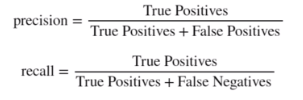

In [54]:
from sklearn.metrics import precision_score, recall_score, roc_auc_score

In [55]:
precision_score(y_mul,y_mul_pred)

0.6493506493506493

In [56]:
recall_score(y_mul,y_mul_pred)

0.6521739130434783

In [57]:
roc_auc_score(y_mul,y_mul_pred)

0.6793478260869567

In [61]:
accuracy_score(y_mul,y_mul_pred)

0.6818181818181818

In [62]:
import matplotlib.pyplot as plt
from sklearn import metrics

* Sensitivity: The probability that the model predicts a positive outcome for an observation when indeed the outcome is positive. This is also called the “true positive rate.”
* Specificity: The probability that the model predicts a negative outcome for an observation when indeed the outcome is negative. This is also called the “true negative rate.”

https://www.statology.org/plot-roc-curve-python/#:~:text=How%20to%20Plot%20a%20ROC%20Curve%20in%20Python,regression%20model%20turns%20out%20to%20be%200.5602.%20

In [63]:
y_pred_proba = (clf_lrs.predict_proba(x_mul)[:,1])
fpr, tpr, _ = metrics.roc_curve(y_mul,  y_pred_proba)

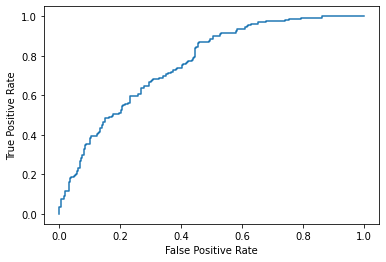

In [64]:
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

#### * Linear Discreminant model (LDA MODEL) :
        It is based on Baye's Theorem.

In [65]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [66]:
clf_lda=LinearDiscriminantAnalysis()

In [67]:
clf_lda.fit(x_mul,y_mul)

LinearDiscriminantAnalysis()

In [146]:
print(clf_lda.intercept_,clf_lda.coef_)

[-1.01085603] [[-2.15874098e-01  2.44568040e-02 -7.64579826e+00  7.36468077e-01
  -1.29624839e-03  2.70322934e-01 -1.78649133e-01  1.79631337e-01
  -6.38370882e-02 -3.74838535e-03  3.42516302e+01 -9.62590201e-02
  -1.68578994e-01 -2.02732065e-01 -1.52203905e-01  2.00388624e-01]]


In [68]:
y_lda_pred=clf_lda.predict(x_mul)

In [69]:
confusion_matrix(y_mul,y_lda_pred)

array([[192,  84],
       [ 79, 151]], dtype=int64)

In [70]:
fpr_lda,tpr_lda,_=metrics.roc_curve(y_mul,  y_lda_pred)

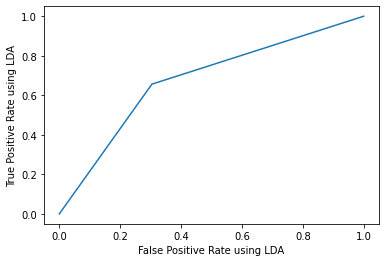

In [71]:
plt.plot(fpr_lda,tpr_lda)
plt.xlabel('False Positive Rate using LDA')
plt.ylabel('True Positive Rate using LDA')
plt.show()

In [72]:
y_lda_pred

array([1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1,

In [73]:
precision_score(y_mul,y_lda_pred)

0.6425531914893617

In [74]:
roc_auc_score(y_mul,y_lda_pred)

0.6760869565217391

In [75]:
from sklearn.metrics import accuracy_score

In [76]:
accuracy_score(y_mul,y_lda_pred)

0.6778656126482213

In [77]:
from sklearn.model_selection import train_test_split

In [78]:
x_train,x_test,y_train,y_test=train_test_split(x_mul,y_mul,test_size=0.2,random_state=0)

In [80]:
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(404, 16) (102, 16) (404,) (102,)


In [102]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
pipe = make_pipeline(StandardScaler(), LogisticRegression())
pipe.fit(x_train,y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression())])

In [98]:
pipe.score(x_test, y_test)  # apply scaling on testing data, without leaking training data.

0.6666666666666666

### KNN

In [109]:
from sklearn import preprocessing

In [110]:
scaler=preprocessing.StandardScaler().fit(x_train)

In [111]:
x_train_s=scaler.transform(x_train)

In [112]:
scaler=preprocessing.StandardScaler().fit(x_test)
x_test_s=scaler.transform(x_test)

In [115]:
from sklearn.neighbors import KNeighborsClassifier
knn_1=KNeighborsClassifier(n_neighbors=1)
knn_1.fit(x_train_s,y_train)

KNeighborsClassifier(n_neighbors=1)

In [118]:
confusion_matrix(y_test,knn_1.predict(x_test_s))

array([[30, 28],
       [19, 25]], dtype=int64)

In [120]:
accuracy_score(y_test,knn_1.predict(x_test_s))

0.5392156862745098

In [116]:
knn_3=KNeighborsClassifier(n_neighbors=3)
knn_3.fit(x_train_s,y_train)

KNeighborsClassifier(n_neighbors=3)

In [119]:
confusion_matrix(y_test,knn_3.predict(x_test_s))

array([[32, 26],
       [21, 23]], dtype=int64)

In [122]:
accuracy_score(y_test,knn_3.predict(x_test_s))

0.5392156862745098

In [123]:
from sklearn.model_selection import GridSearchCV

In [137]:
params={'n_neighbors': [1,2,3,4,5,6,7,8,9,10,20,25]}

In [138]:
grid_search_cv=GridSearchCV(KNeighborsClassifier(),params)

In [139]:
grid_search_cv.fit(x_train_s,y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 20,
                                         25]})

In [140]:
grid_search_cv.best_params_

{'n_neighbors': 9}

In [141]:
optimised_KNN=grid_search_cv.best_estimator_
y_test_pred=optimised_KNN.predict(x_test_s)

In [142]:
confusion_matrix(y_test,y_test_pred)

array([[36, 22],
       [18, 26]], dtype=int64)

In [143]:
accuracy_score(y_test,y_test_pred)

0.6078431372549019